# Topics
## 1. Matrix Manipulation in Python
## 2. Relaxation Method and the Laplace Equation.


## 1. Matrix Manipulation in Python

In [2]:
'''Important:

For most purposes, 

M = np.matrix([[1., 1.5, 3.],
              [-1., 11., -1.],
              [0., -1., 10.]])

and

M = np.array([[1., 1.5, 3.],
              [-1., 11., -1.],
              [0., -1., 10.]])

give you the same thing.  But certain matrix methods don't apply to a numpy array 
(such as the inverse; note: .I and .getI() both give you the inverse.).

For the whole list of methods:

http://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html

or do 

>>> dir(M)

'''

import numpy as np
M1 = np.matrix([[1., 1.5, 3.],
              [-1., 11., -1.],
              [0., -1., 10.]])

M2 = np.matrix([[10., 1., 2.],
              [1., 1., 4.3],
              [2., -1., 10.]])

a = np.array([1., 2., 3.])
b = np.array([1., 1/2., 1/3.])

M_sum = a + b
print 'M_sum', M_sum

# np.dot
# for 1D -- dot product
dot_product = np.dot(a, b)
print 'dot_product:', dot_product



M_sum [ 2.          2.5         3.33333333]
dot_product: 3.0


In [ ]:
# Note: attributes are listed first, before the dunder (special) methods.
print dir(M1)

In [4]:
# for 2D -- matrix multiplication
M_multip = np.dot(M1, M2)
print 'M_multip:'
print M_multip

# another example of matrix multiplication
M1_op_a = np.dot(M1, a)
print 'M1_op_a:'
print M1_op_a

# transpose
M1_T = M1.T
print 'Transposed M1:'
print M1_T

# trace
print 'M1_trace', M1.trace()

# inverse
print 'M1_inverse:' 
print M1.I
print '...to verify (M1*M1_inverse):'
# Note: for most python operations, the numerical error is on the level of 1e-16.
print np.dot(M1.I, M1)

M_multip:
[[ 17.5   -0.5   38.45]
 [ -1.    11.    35.3 ]
 [ 19.   -11.    95.7 ]]
M1_op_a:
[[ 13.  18.  28.]]
Transposed M1:
[[  1.   -1.    0. ]
 [  1.5  11.   -1. ]
 [  3.   -1.   10. ]]
M1_trace [[ 22.]]
M1_inverse:
[[ 0.85826772 -0.14173228 -0.27165354]
 [ 0.07874016  0.07874016 -0.01574803]
 [ 0.00787402  0.00787402  0.0984252 ]]
...to verify (M1*M1_inverse):
[[  1.00000000e+00   0.00000000e+00   4.44089210e-16]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


In [ ]:
# To get the determinant
import numpy.linalg as LA
import numpy as np
M1 = np.matrix([[1., 1.5, 3.],
              [-1., 11., -1.],
              [0., -1., 10.]])
print "Determinant of M1", LA.det(M1)

## Quick Breakout

### Write a function, solve_eqn() that solves the following matrix equations.  You should catch the expected exception of a non-invertible matrix.

### Mx = b

### A) 
M1 = np.matrix([[1., 1.5, 3.],[-1., 11., -1.],[0., -1., 10.]]) and b = np.array([1., 1/2., 1/3.])

### B) 
M2 = np.matrix([[1.,0., 0.],[-2., 0., 0.],[4., 6., 1.]]) and c = np.array([1., 2., 3.])

### C) 
M3 = np.matrix([[1., 1.5, 3.],[-1., 11., -1.],[0., -1., 10.]]) and d = np.array([1., 2., 3.])

In [ ]:
M1 = np.matrix([[1., 1.5, 3.],[-1., 10., -1.],[0., -1., 10.]]) 
b = np.array([1., 1/2., 1/3.])
soln = solve_eqn(M1, b)
print 'Solution:', soln

In [ ]:
M2 = np.matrix([[1.,0., 0.],[-2., 0., 0.],[4., 6., 1.]]) 
c = np.array([1., 2., 3.])
soln = solve_eqn(M2, c)
print 'Solution:', soln

In [ ]:
M3 = np.matrix([[-3. , -5., 1.], [9. ,14., 1.],  [18., 29., -2.]])
d = np.array([3., 2., 1.])
soln = solve_eqn(M3, d)
print 'Solution:', soln
# print M2.I
# print LA.det(M2)

## 2. Relaxation Method and the Laplace Equation.


### The name, "Relaxation Method":

### For example, for the diffusion equation, an initial temperature distribution u(x, t) "relaxes" to an equilibrium solution as t -> inf.

(See Numerical Recipes 3rd. Ed. p. 1059)

## Relaxation Methods: The Jacobi Method
### Solving a linear set of equations

In [17]:
'''

The Jacobi Method: The matrix approach.

This cell is copied verbatim from last class (wk7-2)

'''


import numpy as np

max_iter = 100

# initialize the matrix
A = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

D = np.diag(A)
print "The diagonal elements:\n", D
print "The diagonal matrix:\n", np.diagflat(D)
R = A - np.diagflat(D)
print "The remainder matrix:\n", R

# initialize the RHS vector
b = np.array([6., 25., -11., 15.])


# prints the linear system
print("System of Linear Equations:")
for i in range(A.shape[0]):
    row = ["{}*x{}".format(A[i, j], j + 1) for j in range(A.shape[1])]
    print " + ".join(row) + "=" + str(b[i])
print '\n\n'

# Initial Guess: Usually you would want an "educated" guess, 
# typcially x_guess = D^(-1)b. 
# But because the method is so robust, it hardly matters...
# We will try all 0's and a set of random numbers.
x = np.zeros(b.shape)
#x = np.random.rand(b.shape[0])
# specify tolerance
tol = 1e-4

counter = 0
print 'Starting Jacobi method iterations...'
while counter < max_iter:
    print "Iteration {:d}:{}".format(counter, x)
    # Just to create a numpy array that has the same dimension as x.
    x_new = np.empty(x.shape)

    for i in range(A.shape[0]):
        # np.dot computes dot product
        
        s = np.dot(R[i,], x)
        x_new[i] = (b[i] - s) / A[i, i]
            
    counter += 1      
    # Returns True if two arrays are element-wise equal within a tolerance.
    if np.allclose(x, x_new, rtol=tol):
        print 'Tolerance achieved.  Printing results...'
        break      
    else:
        if counter == max_iter:
            raise Exception('max_iter exceeded!')

    x = x_new

print '\n\n'
print "Solution:", x 
print "Estimated Error:", (np.dot(A, x) - b)/b 

The diagonal elements:
[ 10.  11.  10.   8.]
The diagonal matrix:
[[ 10.   0.   0.   0.]
 [  0.  11.   0.   0.]
 [  0.   0.  10.   0.]
 [  0.   0.   0.   8.]]
The remainder matrix:
[[ 0. -1.  2.  0.]
 [-1.  0. -1.  3.]
 [ 2. -1.  0. -1.]
 [ 0.  3. -1.  0.]]
System of Linear Equations:
10.0*x1 + -1.0*x2 + 2.0*x3 + 0.0*x4=6.0
-1.0*x1 + 11.0*x2 + -1.0*x3 + 3.0*x4=25.0
2.0*x1 + -1.0*x2 + 10.0*x3 + -1.0*x4=-11.0
0.0*x1 + 3.0*x2 + -1.0*x3 + 8.0*x4=15.0



Starting Jacobi method iterations...
Iteration 0:[ 0.  0.  0.  0.]
Iteration 1:[ 0.6         2.27272727 -1.1         1.875     ]
Iteration 2:[ 1.04727273  1.71590909 -0.80522727  0.88522727]
Iteration 3:[ 0.93263636  2.05330579 -1.04934091  1.13088068]
Iteration 4:[ 1.01519876  1.95369576 -0.96810863  0.97384272]
Iteration 5:[ 0.9889913   2.01141473 -1.0102859   1.02135051]
Iteration 6:[ 1.00319865  1.99224126 -0.99452174  0.99443374]
Iteration 7:[ 0.99812847  2.00230688 -1.00197223  1.00359431]
Iteration 8:[ 1.00062513  1.9986703  -0.99903

## Relaxation Methods: The Laplace Equation


More at http://en.wikipedia.org/wiki/Relaxation_(iterative_method)

[ 0.          0.09999645  0.19999358  0.2999916   0.39999061  0.49999061
  0.5999915   0.69999313  0.79999525  0.89999763  1.        ]


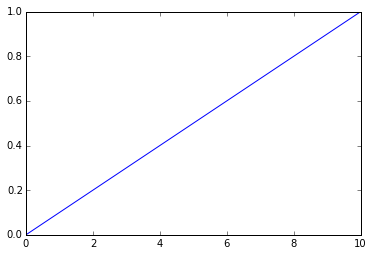

In [4]:
%matplotlib inline
'''

Jacobi Method: the for-loop approach -- 1D example.

Note how the initial guess of all zeros over a number of iterations "relaxes" to the final solution -- not unlike
an initial temperature distribution relaxes to the steady-state distribution (solution).

'''



import numpy as np
import matplotlib.pyplot as plt

NX = 11

#initialization
V = np.zeros(NX)


#Boundary Conditions:
V[NX-1] = 1.
V[0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)

while diff > maxdiff:
    diff = 0.         #crucial!!
    # start from 1 and end at NX-2: because you don't want to change the BC!!
    for i in range(1, NX-1):    
        newV = (V[i-1]+V[i+1])/2
        prev_diff = abs(newV - V[i])
        # to find the maximum difference in each loop (going over all interior points).
        V[i] = newV
        if diff < prev_diff:    
            diff = prev_diff
  
            
print V
plt.plot(x, V)
plt.show()
          

## The Physics:
### This corresponds to the electric potential of a parallel plate capacitor 
### (length, width >> thickness)

## Breakout Problem:
### For a long rectangular tube, the potential on two opposite sides = 1 volt, and the potential on the other two sides = 0.  
### Write a program to find V(x, y) in the interior of the tube.   Start with (2x2) interior grid points.
### Then plot the result as a surface plot.

In [21]:
%matplotlib osx
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

NX = 20
NY = 20

#initialization
V = np.zeros((NX,NY))


#Boundary Conditions:
V[NX-1,:] = 1.
V[0,:] = 1.
V[:,NY-1] = 0
V[:,0] = 0
maxdiff = 1e-6
diff = 1
x = np.arange(NX)
y = np.arange(NY)

while diff > maxdiff:
    diff = 0.         #crucial!!
    # start from 1 and end at NX-2: because you don't want to change the BC!!
    for i in range(1, NX-1):
        for j in range(1, NY-1):
            newV = (V[i-1,j]+V[i+1,j]+V[i,j-1]+V[i,j+1])/4.
            prev_diff = abs(newV - V[i][j])
            # to find the maximum difference in each loop (going over all interior points).
            V[i][j] = newV
            if diff < prev_diff:    
                diff = prev_diff

            
print V
#plt.plot(x, V)
#plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = y = np.linspace(-5, 5, 100)
xv, yv = np.meshgrid(x,y) #Gives 2d plane of points
#z = func(xv, yv)
#ax.plot_wireframe(xv, yv, z, rstride=4, cstride=4, linewidth=1)
ax.plot_surface(xv, yv, V, rstride =1, cstride =1, cmap=cm.coolwarm, linewidth=0)
plt.show()


[[ 0.          1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          0.        ]
 [ 0.          0.49999879  0.69751046  0.79004784  0.84010044  0.87006448
   0.88903959  0.90115182  0.90842014  0.91184454  0.91184463  0.9084204
   0.90115223  0.88904012  0.87006508  0.84010104  0.79004839  0.6975109
   0.49999904  0.        ]
 [ 0.          0.30248484  0.49999543  0.62258075  0.7002898   0.75111835
   0.78494254  0.80714808  0.82068474  0.82711392  0.8271141   0.82068524
   0.80714888  0.78494356  0.7511195   0.70029098  0.62258183  0.49999628
   0.30248533  0.        ]
 [ 0.          0.20994537  0.37740602  0.49999044  0.5873603   0.64917727
   0.69246492  0.72181404  0.74005767  0.74881318  0.74881343  0.7400584
   0.7218152   0.6924664   0.64917894  0.587362    0.499992    0.37740726
   0.20994608  0.        ]
 [ 0.          0.15989091

## Connection between the "2-for-loop" way and the matrix way -- go to slides.

## Breakout Problem:

### Write a function, jacobi_meth() that takes two positional argument A and b.  It should also take max_iter, tol, and x_guess as keyword argument.  Set the default values as such: max_iter = 100, tol = 1e-6, and the default value of x_guess should be a zero vector.   Finally inside each iteration, no loops allowed.

### Apply this function to the Laplace Equation problem.

### Using the answer we obtained before (for the system of algebraic equations) as the doctest.

## Breakout Solution: See jacobi_meth.py

## End of week 8-1

In [3]:
import numpy as np
A = np.matrix([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])

b = np.array([6., 25., -11., 15.])


def jacobi_meth(A, b, max_iter = 100, tol = 1e-6, x_guess = np.zeros(b.shape)):
    counter = 0
    D = np.diag(A)
    R = A - np.diagflat(D)
    while counter < max_iter:
        print "Iteration {:d}:{}".format(counter, x_guess)
        # Just to create a numpy array that has the same dimension as x.
        x_new = np.empty(x_guess.shape)
        '''
        for i in range(A.shape[0]):
            # np.dot computes dot product

            s = np.dot(R[i,], x_guess)
            x_new[i] = (b[i] - s) / A[i, i]
        '''
        
        x_new = D.I(b-np.dot(R,x_guess))
        
        counter += 1      
        # Returns True if two arrays are element-wise equal within a tolerance.
        if np.allclose(x_guess, x_new, rtol=tol):
            print 'Tolerance achieved.  Printing results...'
            break      
        else:
            if counter == max_iter:
                raise Exception('max_iter exceeded!')

        x_guess = x_new
    

jacobi_meth(A, b)

Iteration 0:[[ 0.  0.  0.  0.]]


AttributeError: 'numpy.ndarray' object has no attribute 'I'

In [14]:
b = np.array([6., 25., -11., 15.])
x_guess = np.zeros(b.shape)
print x_guess

[ 0.  0.  0.  0.]
